# Data Unserstanding

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import seaborn as sns

df = pd.read_csv("./DATA/salary.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 0 to 6706
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6707 non-null   int64  
 1   Gender               6707 non-null   object 
 2   Education Level      6706 non-null   object 
 3   Job Title            6706 non-null   object 
 4   Years of Experience  6705 non-null   float64
 5   Salary               6703 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 314.5+ KB


# Descriptive Statistics

In [96]:
yoe = df["Years of Experience"]
salary = df["Salary"]

summary = {
    "Mean": [yoe.mean(), salary.mean()],
    "Median": [yoe.median(), salary.median()],
    "Modus": [yoe.mode().iloc[0], salary.mode().iloc[0]],
    "Q1": [yoe.quantile(0.25), salary.quantile(0.25)],
    "Q2": [yoe.quantile(0.5), salary.quantile(0.5)],
    "Q3": [yoe.quantile(0.75), salary.quantile(0.75)],
    "Range": [yoe.max() - yoe.min(), salary.max() - salary.min()],
    "Simpangan Rata-rata": [(yoe - yoe.mean()).abs().mean(),
                            (salary - salary.mean()).abs().mean()],
    "Varian": [yoe.var(), salary.var()],
    "Simpangan Baku": [yoe.std(), salary.std()]
}

summary_df = pd.DataFrame(summary, index=["yoe", "salary"])
print(summary_df)

                 Mean    Median     Modus       Q1        Q2        Q3  \
yoe          8.096346       7.0       2.0      3.0       7.0      12.0   
salary  115446.119200  115000.0  140000.0  70000.0  115000.0  160000.0   

           Range  Simpangan Rata-rata        Varian  Simpangan Baku  
yoe         35.0             4.896342  3.681149e+01        6.067248  
salary  999650.0         45868.852935  2.903247e+09    53881.790154  


# Outlier Diagram

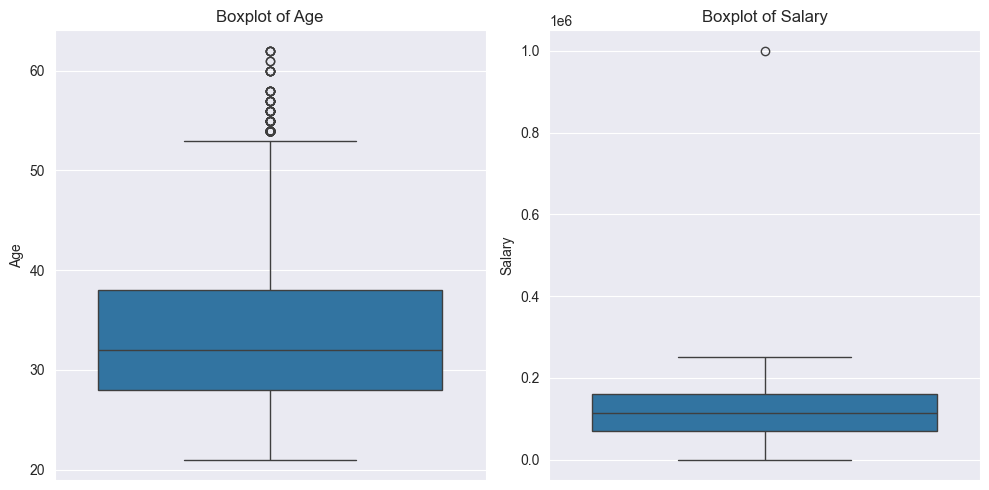

In [97]:
# Outlier Diagram
numerical_cols_outliers = ["Age", "Salary"]
plt.figure(figsize=(10, 5))

for i, col in enumerate(numerical_cols_outliers):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Data Cleaning

In [98]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Cek data missing value
missing_values = df.isnull().sum()
print(f"Jumlah data missing value: {missing_values}")

# Cek outlier Sarlary
outlier_salary = df[df['Salary'] > df['Salary'].mean() + 3 * df['Salary'].std()]
print(f"Jumlah outlier salary: {outlier_salary.shape}, {outlier_salary}")

# Drop duplikat
df = df.drop_duplicates()

# Drop missing value
df = df.dropna()

# Drop outlier
df = df[df["Salary"].copy() < outlier_salary['Salary'].min()]

print(f"Ukuran dataset setelah pembersihan: {df.shape}")

Jumlah baris duplikat: 4913
Jumlah data missing value: Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64
Jumlah outlier salary: (1, 6),       Age  Gender Education Level Job Title  Years of Experience     Salary
6706   60  Female             PhD       CEO                 35.0  1000000.0
Ukuran dataset setelah pembersihan: (1786, 6)


In [99]:
# Check naming unique and standarized if needed
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())


df["Education Level"] = df["Education Level"].str.lower().str.strip()

df["Education Level"] = df["Education Level"].replace(
    {"bachelor's degree": "bachelor", "master's degree": "master", "phd": "phd"})

df["Education Level"] = df["Education Level"].str.replace("'s", "")

print("Distribusi kolom 'Education Level' setelah standardisasi:")
print(df["Education Level"].value_counts())

# Change column names to a standard
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]



Kolom: Gender
Gender
Male      966
Female    813
Other       7
Name: count, dtype: int64

Kolom: Education Level
Education Level
Bachelor's Degree    506
Master's Degree      446
PhD                  340
Bachelor's           261
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Kolom: Job Title
Job Title
Software Engineer Manager             127
Full Stack Engineer                   122
Senior Software Engineer               96
Senior Project Engineer                95
Back end Developer                     81
                                     ... 
Junior Social Media Specialist          1
Senior Product Development Manager      1
Social Media Man                        1
Delivery Driver                         1
Intern                                  1
Name: count, Length: 192, dtype: int64
Distribusi kolom 'Education Level' setelah standardisasi:
Education Level
bachelor       767
master         568
phd            341
high scho

# Corelation and Scatter Plot

In [116]:
correlation = df["years_of_experience"].corr(df["salary"])
print(f"Korelasi antara age dan salary adalah {correlation}")

r2 = correlation ** 2
print(f"Koefisien determinasi (R²) antara age dan salary adalah {r2}")

Korelasi antara age dan salary adalah 0.8185836935242641
Koefisien determinasi (R²) antara age dan salary adalah 0.6700792633038263


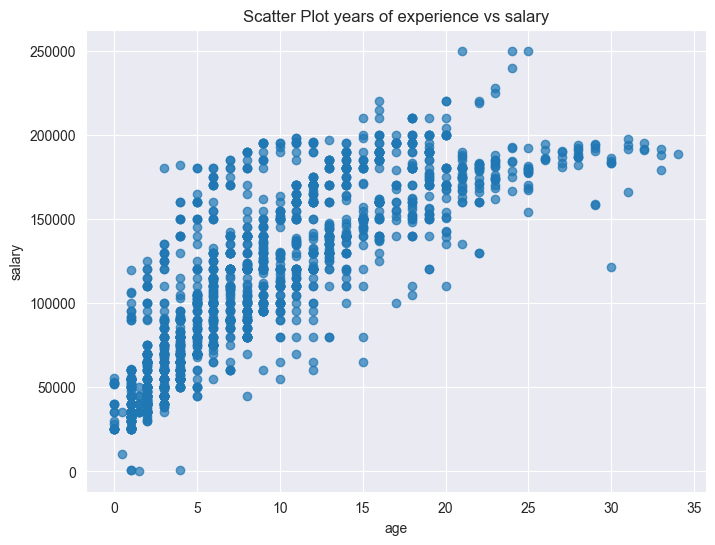

In [117]:
plt.figure(figsize=(8, 6))
plt.scatter(df["years_of_experience"], df["salary"], alpha=0.7)
plt.title("Scatter Plot years of experience vs salary")
plt.xlabel("age")
plt.ylabel("salary")
plt.show()

# Regression Line

In [115]:
df = df.reset_index(drop=True)
df.index = df.index + 1


model = smf.ols("salary ~ years_of_experience", data=df).fit()
print(model.params)

intercept_yoe_salary = model.params["Intercept"]
slope_yoe_salary = model.params["years_of_experience"]

ssr_yoe_salary = model.ssr

print(f"Jumlah kuadrat Residual (SSR) untuk model Salary vs Years of Experience adalah {ssr_yoe_salary}")
print(f"Persamaan Garis Regresi Years of Experience vs Salary adalah {intercept_yoe_salary} + {slope_yoe_salary} * Years of Experience")
print(f"R2 untuk model Salary vs Years of Experience adalah {model.rsquared}")

               age  years_of_experience         salary
count  1786.000000          1786.000000    1786.000000
mean     35.141097             9.159854  113197.641097
std       8.217098             6.845089   51625.162830
min      21.000000             0.000000     350.000000
25%      29.000000             3.000000   70000.000000
50%      33.000000             8.000000  110000.000000
75%      41.000000            13.000000  160000.000000
max      62.000000            34.000000  250000.000000
Intercept              56647.461242
years_of_experience     6173.698537
dtype: float64
Jumlah kuadrat Residual (SSR) untuk model Salary vs Years of Experience adalah 1569533908574.2651
Persamaan Garis Regresi Years of Experience vs Salary adalah 56647.46124238645 + 6173.698537308482 * Years of Experience
R2 untuk model Salary vs Years of Experience adalah 0.6700792633038228


# Predict Salary

In [109]:
def predict_salary(years_of_experience):
    return intercept_yoe_salary + slope_yoe_salary * years_of_experience

years_exp = 7
predicted_salary = predict_salary(years_exp)
print(f"Prediksi salary untuk {years_exp} tahun pengalaman adalah {predicted_salary}")

Prediksi salary untuk 7 tahun pengalaman adalah 99863.35100354583


# Visualisasi Distribusi

Hasil uji Shapiro-Wilk untuk salary adalah ShapiroResult(statistic=np.float64(0.9621784485213496), pvalue=np.float64(3.496373273585635e-21))
Distribusi salary tidak mengikuti distribusi normal (tolak H0)


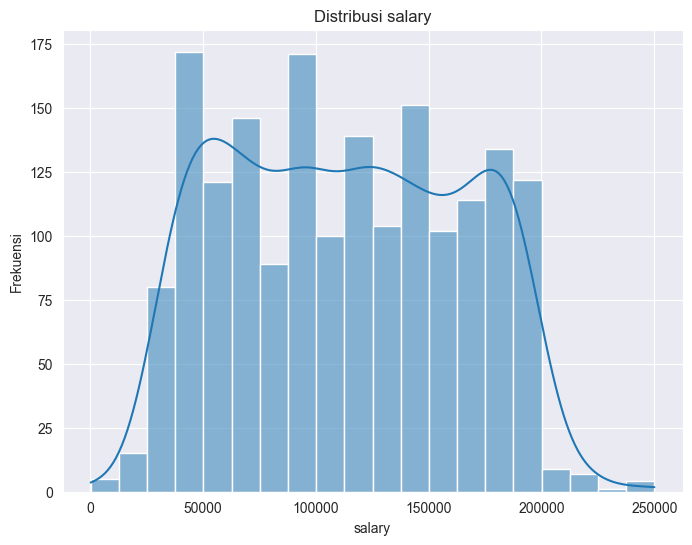

In [108]:
shapiro_test = stats.shapiro(df["salary"])

print(f"Hasil uji Shapiro-Wilk untuk salary adalah {shapiro_test}")

alpha = 0.05

if shapiro_test.pvalue > alpha:
    print("Distribusi salary mengikuti distribusi normal (gagal tolak H0)")
else:
    print("Distribusi salary tidak mengikuti distribusi normal (tolak H0)")

plt.figure(figsize=(8, 6))
sns.histplot(df["salary"], kde=True, bins=20)
plt.title("Distribusi salary")
plt.xlabel("salary")
plt.ylabel("Frekuensi")
plt.show()